# Welcome to your first Jupyter Notebook!

## We're first going to import some libraries which add a lot of additional capabilities for us to use, and also make our coding lives alot easier! 

In [2]:
! pip install numpy 
! pip install matplotlib
! pip install scipy
! pip install ipywidgets 
! pip install IPython

! jupyter nbextension enable --py --sys-prefix widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


In [3]:
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as scp 
import time 

# 1) Mass on a spring 

### Let's first review our equations of motion for a mass on a spring. A box of mass $m$ attached to a spring with a spring constant $k$ can be displaced by some distance $x$. The force the box experiences is given by $$\vec{F} = m\vec{a} = -k\vec{x} $$

### We have solved the differential equation that describes this motion and found that the motion of the particle as a function of time can be given by position and velocity functions: $$x(t) = A \cos{(\omega t + \phi)}$$ $$v(t) = -\omega A\sin{(\omega t + \phi)}$$
### where $\omega = \sqrt{k/m}$ is the frequency of the mass as it oscillates, $t$ is time, $\phi$ is a phase shift, and $A$ is the amplitude of the motion. 

## Let's graph the position as a function of time. Suppose we have $m=1$kg and $k=1$N/m, and let $A = 1$ meter. Then $$\omega = 1 $$ with units rad/second.

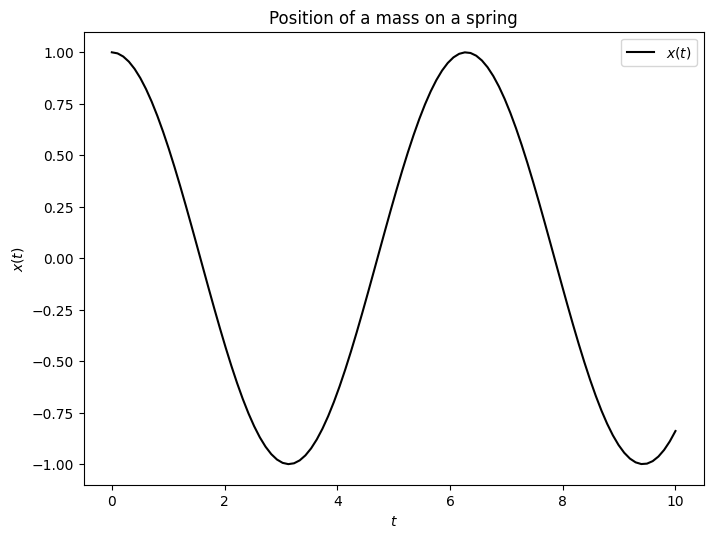

In [6]:
A = 1 #variable for amplitude
k = 1 #variable for spring constant
m = 1 #variable for mass
t = np.linspace(0, 10, 100) #array of times

#defining my function for the position of the mass according to the formula we derived
def position(time, mass, K, amplitude): 
    
    omega = np.sqrt(K/mass)
    
    x_of_t = amplitude*np.cos(omega*time)
    
    return x_of_t

#time to plot!
plt.figure(figsize = (8, 6), dpi = 100)
plt.plot(t, position(t, m, k, A), color = 'k', label = r'$x(t)$')
plt.xlabel(r"$t$"), plt.ylabel(r"$x(t)$"), plt.title("Position of a mass on a spring")
plt.legend()

### What is the period? Well it's the time at which the position completes one cycle; if the position starts at it's maximum value, the period is the time at which the position is at a maximum again. 

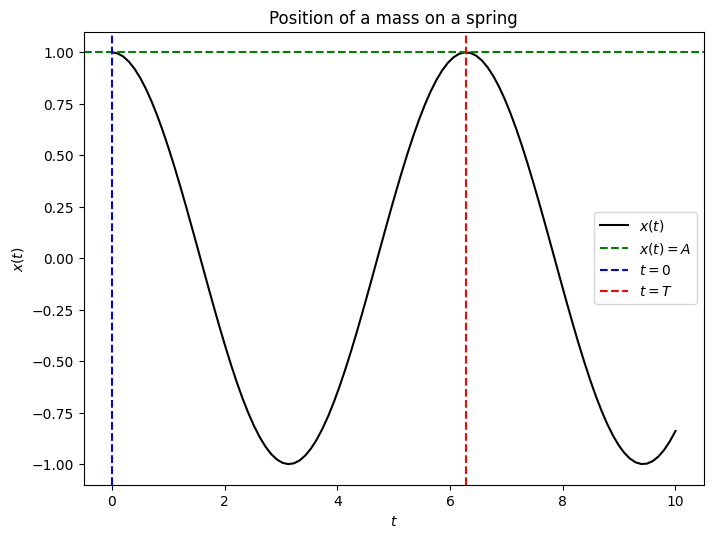

In [7]:
plt.figure(figsize = (8, 6), dpi = 100)
plt.plot(t, position(t, m, k, A), color = 'k', label = r'$x(t)$')
plt.xlabel(r"$t$"), plt.ylabel(r"$x(t)$"), plt.title("Position of a mass on a spring")
plt.axhline(1, 0, 1, color = 'g', linestyle = '--', label = r'$x(t) = A$')
plt.axvline(0, 0, 1, color = 'b', linestyle = '--', label = r'$t=0$')
plt.axvline(2*np.pi, 0, 1, color = 'r', linestyle = '--', label = r'$t=T$')
plt.legend()

## Let's now do the same with velocity!

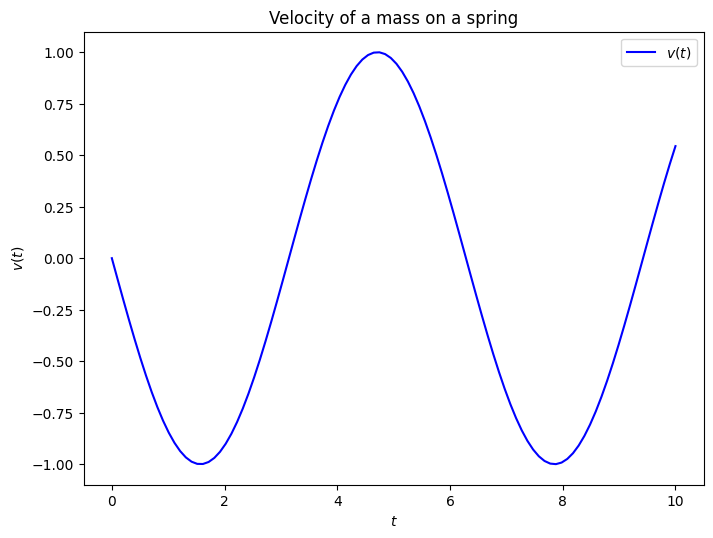

In [8]:
A = 1 #variable for amplitude
k = 1 #variable for spring constant
m = 1 #variable for mass
t = np.linspace(0, 10, 100) #array of times

def velocity(time, mass, K, amplitude): 
    
    omega = np.sqrt(K/mass)
    
    v_of_t = -omega*amplitude*np.sin(omega*time)
    
    return v_of_t

#time to plot!
plt.figure(figsize = (8, 6), dpi = 100)
plt.plot(t, velocity(t, m, k, A), color = 'blue', label = r'$v(t)$')
plt.xlabel(r"$t$"), plt.ylabel(r"$v(t)$"), plt.title("Velocity of a mass on a spring")
plt.legend()

## We can plot the velocity against the position to get an interesting perspective on the motion of the mass as it oscillates. This is often referred to as a phase plot.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


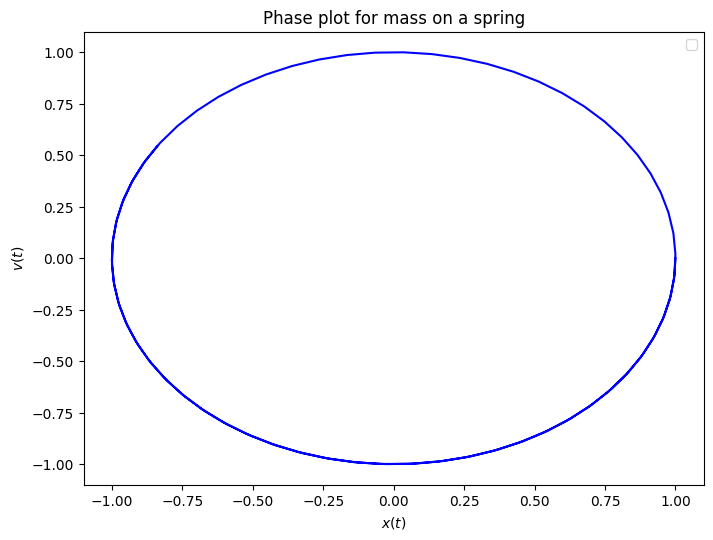

In [9]:
x_values = np.array([position(ti, m, k, A) for ti in t])
v_values = np.array([velocity(ti, m, k, A) for ti in t])

plt.figure(figsize = (8, 6), dpi = 100)
plt.plot(x_values, v_values, color = 'blue')
plt.xlabel(r"$x(t)$"), plt.ylabel(r"$v(t)$"), plt.title("Phase plot for mass on a spring")
plt.legend()

## Lets see if we can understand how changing the mass or spring constant will change the behavior. 

In [10]:
%matplotlib inline
import ipywidgets as ipyw 

A = 1 #variable for amplitude
time = np.linspace(0, 4*np.pi, 100) #array of times

#defining my function for the position of the mass according to the formula we derived
def position(t, mass, K, amplitude): 
    
    omega = np.sqrt(K/mass)
    
    x_of_t = amplitude*np.cos(omega*t)
    
    return x_of_t

#defining a function which will update the position function based on the value of the mass and spring constant
def plot_with_slider(mass = 1, K = 1): 
    
    x = position(time, mass, K, A)
    
    period = 2*np.pi/np.sqrt(K/mass)
    plt.figure(figsize=(6,4), dpi = 120)
    plt.plot(time, x, color = 'k')
    plt.xlabel(r"$t$"), plt.ylabel(r"$x(t)$"), plt.title("Position of a mass on a spring")
    plt.axvline(period, 0, 1, color = 'r', linestyle = '--')
    plt.text(14, 0.0, f"T = {period:.02f}s")
    

interactive_plot = ipyw.interactive(plot_with_slider, mass = (1, 5, 1), K = (1,25, 1))
interactive_plot

interactive(children=(IntSlider(value=1, description='mass', max=5, min=1), IntSlider(value=1, description='K'…

## Let's do the same thing, but now with $v(t)$ vs $x(t)$

In [11]:
%matplotlib inline
import ipywidgets as ipyw 

A = 1 #variable for amplitude
time = np.linspace(0, 4*np.pi, 1000) #array of times

#defining my function for the position of the mass according to the formula we derived
def position(t, mass, K, amplitude): 
    
    omega = np.sqrt(K/mass)
    
    x_of_t = amplitude*np.cos(omega*t)
    
    return x_of_t

def velocity(t, mass, K, amplitude): 
    
    omega = np.sqrt(K/mass)
    
    v_of_t = -omega*amplitude*np.sin(omega*t)
    
    return v_of_t

#defining a function which will update the position function based on the value of the mass and spring constant
def plot_with_slider(mass = 1, K = 1): 
    
    x = position(time, mass, K, A)
    v = velocity(time, mass, K, A)
    
    frequency = np.sqrt(K/mass)
    plt.figure(figsize=(6,6), dpi = 120)
    plt.plot(x, v, color = 'k')
    plt.xlabel(r"$x(t)$"), plt.ylabel(r"$v(t)$"), plt.title("Phase portrait of a mass on a spring")
    plt.xlim(-2.1, 2.1), plt.ylim(-2.1, 2.1)
    #plt.axvline(period, 0, 1, color = 'r', linestyle = '--')
    plt.text(0, 0.0, r"$\omega$ = {:.02f}Hz".format(frequency))
    

interactive_plot = ipyw.interactive(plot_with_slider, mass = (1, 5, 1), K = (1,25, 1))
interactive_plot

interactive(children=(IntSlider(value=1, description='mass', max=5, min=1), IntSlider(value=1, description='K'…

## Finally, let's take a look at how the force acts on the pendulum at different points.

In [12]:
%matplotlib inline
import ipywidgets as ipyw 

Amp = 1 
Mass = 1 
k = 1

#defining my function for the position of the mass according to the formula we derived
def position(t, mass, K, amplitude): 
    
    omega = np.sqrt(K/mass)
    
    x_of_t = amplitude*np.cos(omega*t)
    
    return x_of_t

def velocity(t, mass, K, amplitude): 
    
    omega = np.sqrt(K/mass)
    
    v_of_t = -omega*amplitude*np.sin(omega*t)
    
    return v_of_t

def Force(t, mass, K, amplitude): 
    
    F = -K*position(t, mass, K, amplitude)
    
    return F

#defining a function which will update the position function based on the value of the mass and spring constant
def plotForce_with_slider(time = 0): 
    
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6), dpi = 120)
    
    x = position(time, Mass, k, Amp)
    v = velocity(time, Mass, k, Amp)
    f = Force(time, Mass, k, Amp)
    
    ax1.plot(x, 0, color = 'k', marker = 's', markersize = 20)
    ax1.set(xlabel= r"$x(t)$", title="Mass on a spring")
    ax1.set(xlim =(-1.1, 1.1), ylim = (-1.1,1.1))
    ax1.text(x-0.1, 0.15, r'x = {:.02f}'.format(x))
    ax1.arrow(x, 0.45, -x, 0, width = 0.005, head_width = 0.1*np.abs(x), color = 'red')
    ax1.text(0, 0.55, r"$F = -kx = {:.02f}$ N".format(-x))
    
    tvals = np.linspace(0, 10, int(10/0.01))
    circleX, circleV = position(tvals, Mass, k, Amp), velocity(tvals, Mass, k, Amp)
    ax2.plot(x, v, color = 'b', marker = 'o', markersize = 10)
    ax2.plot(circleX, circleV, color = 'k')
    ax2.set(xlabel= r"$x(t)$", ylabel = r"$v(t)$", title = 'Phase portrait')
    ax2.set(xlim =(-1.1, 1.1), ylim = (-1.1,1.1))

interactive_plot = ipyw.interactive(plotForce_with_slider, time = (0, 10, 0.01))
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='time', max=10.0, step=0.01), Output()), _dom_classes…